# DAB-SMOTE INTRO #
## Authors: Unai Lalana Morales & José Antonio Sanz Delgado ##

### Basic imports ###

In [1]:
#Sistem imports
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'classes')))

#Local imports
import pandas as pd
import numpy as np

#Data science imports
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn import model_selection

In [2]:
#autoreload
%load_ext autoreload
%autoreload 2

#DAB-SMOTE import
import DAB_SMOTE

### Read the csv and create the Dataset and the label array ###

In [3]:
#Read data from file and split into X and y
df = pd.read_csv("./../data/initial_test/glass4.dat", header=None)
X = np.array(df.loc[:, df.columns != 9])
y = np.array(df[9])

### Visualization of the data distribution ###

Positive Class: 13  Negative Class: 201
Imbalance Ratio: 15.46


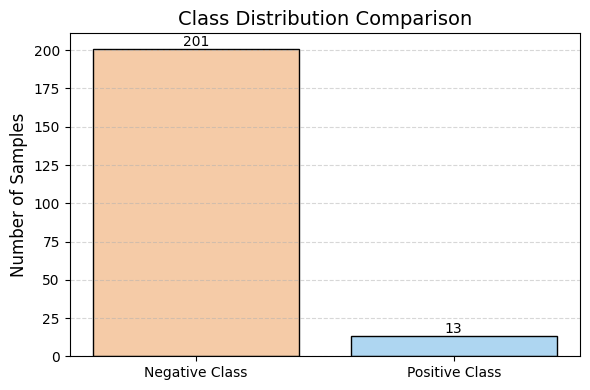

In [4]:
#Display information about the dataset
positive_class = np.sum(df[9] == " positive")
negative_class = np.sum(df[9] == " negative")

print("Positive Class:", positive_class, " Negative Class:", negative_class)
print("Imbalance Ratio:", round(negative_class / positive_class, 2))

labels = ['Negative Class', 'Positive Class']
values = [negative_class, positive_class]
colors = ['#F5CBA7', '#AED6F1']

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height , f'{height}', 
             ha='center', va='bottom', fontsize=10)

plt.title('Class Distribution Comparison', fontsize=14)
plt.ylabel('Number of Samples', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Train test split ###

In [5]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.35, random_state=42, stratify= y)

### Clasification without oversampling ###

0.0


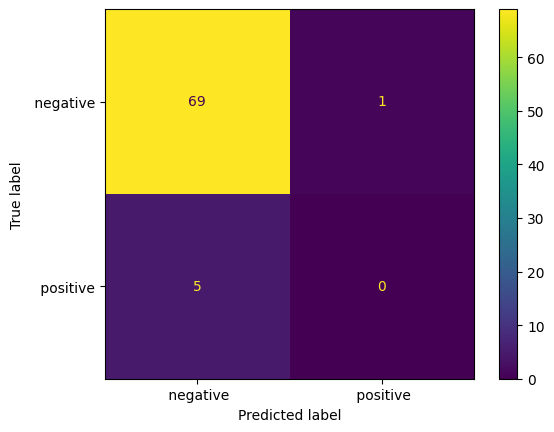

In [6]:
#Classifier without DAB-SMOTE
clasificadorNormal = linear_model.LogisticRegression(penalty='l2',solver='lbfgs', max_iter=1000)
clasificadorNormal.fit(X_train, y_train)

predictions = clasificadorNormal.predict(X_test)

print(f1_score(np.array(y_test), predictions, pos_label=" positive"))

cm = confusion_matrix(y_test, predictions, labels=clasificadorNormal.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clasificadorNormal.classes_)
disp.plot()
plt.show()

### Clasification with oversampling ###

100%|██████████| 123/123 [00:00<00:00, 3454.14it/s]


--- Summary ---
Status code: 1
Status message: Resample Succeeded.
Number of examples removed: 0
Number of clusters: 1
Number of examples generated: 123
Border samples percentage: 0.125
---------------
F1-Score for test 0.8


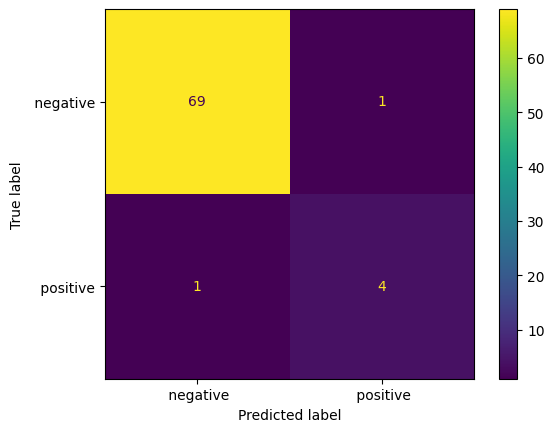

In [21]:
#Classifier with DAB-SMOTE
dab = DAB_SMOTE.DAB_SMOTE(dist_method = "euclidean", k = 2, progress = True)
X_train_oversampled, y_train_oversampled = dab.fit_resample(X_train, y_train)
dab.summary
clasificadorOver = linear_model.LogisticRegression(penalty='l2',solver='lbfgs', max_iter=1000)
clasificadorOver.fit(X_train_oversampled, y_train_oversampled)

predictions = clasificadorOver.predict(X_test)
print("F1-Score for test" , f1_score(np.array(y_test), predictions, pos_label=" positive"))

cm = confusion_matrix(y_test, predictions, labels=clasificadorOver.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clasificadorOver.classes_)
disp.plot()
plt.show()